In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import networkx as nx
import os
from zipfile import ZipFile

zip_path = '/content/drive/MyDrive/Colab Notebooks/archive.zip'
extract_to = '/content/drive/MyDrive/EarthEngineData'

os.makedirs(extract_to, exist_ok=True)

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

nodes_path = os.path.join(extract_to, 'Raw Dataset', 'Nodes', 'Nodes.csv')
edges_plant_path = os.path.join(extract_to, 'Raw Dataset', 'Edges', 'Edges (Plant).csv')

nodes_df = pd.read_csv(nodes_path)
edges_plant_df = pd.read_csv(edges_plant_path)

G = nx.Graph()

for node in nodes_df['Node']:
    G.add_node(node)

for _, row in edges_plant_df.iterrows():
    G.add_edge(row['node1'], row['node2'], plant=row['Plant'])

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")



Number of nodes: 40
Number of edges: 360


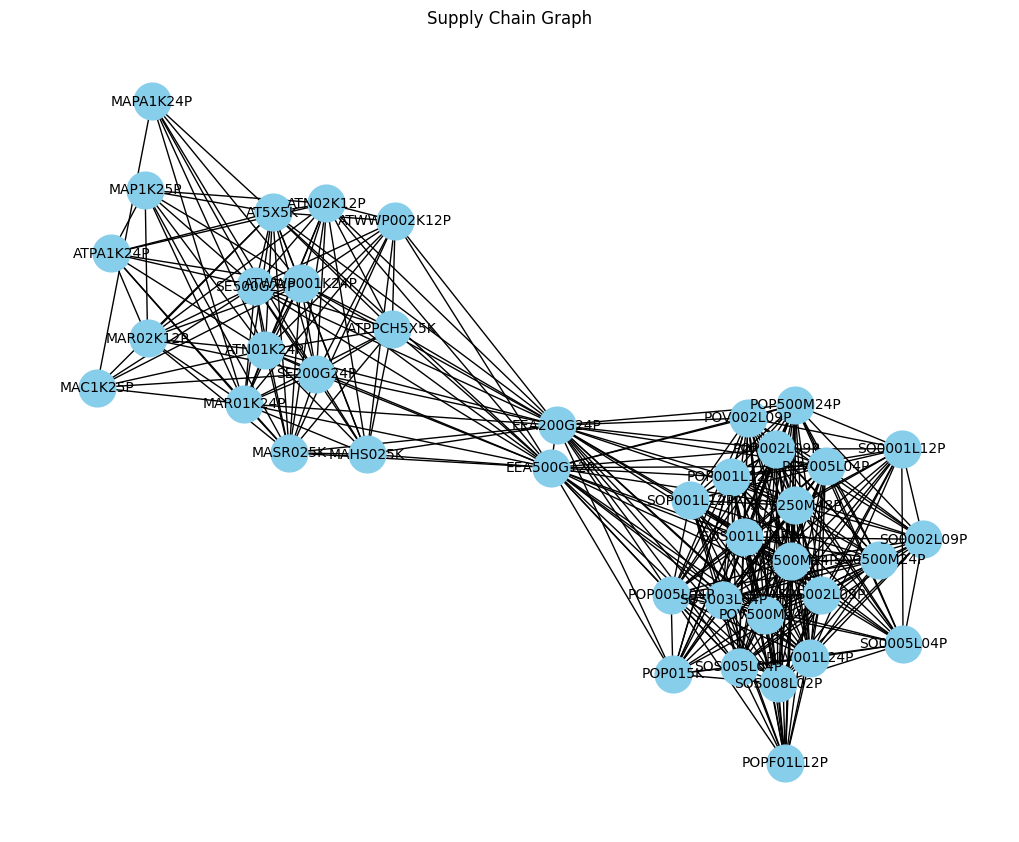

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='k', node_size=700, font_size=10)
plt.title("Supply Chain Graph")
plt.show()


In [4]:
pip install -U python-louvain

Top 5 Nodes by Degree Centrality: [('EEA500G12P', 0.717948717948718), ('EEA200G24P', 0.717948717948718), ('SOS008L02P', 0.5897435897435898), ('SOS005L04P', 0.5897435897435898), ('SOS003L04P', 0.5897435897435898)]
Top 5 Nodes by Betweenness Centrality: [('EEA500G12P', 0.23751686909581646), ('EEA200G24P', 0.23751686909581646), ('AT5X5K', 0.0298775785617891), ('ATN01K24P', 0.0298775785617891), ('MAR01K24P', 0.0298775785617891)]
Top 5 Nodes by Closeness Centrality: [('EEA500G12P', 0.78), ('EEA200G24P', 0.78), ('SOS008L02P', 0.65), ('SOS005L04P', 0.65), ('SOS003L04P', 0.65)]


<ipython-input-29-6524abe8a8c3>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


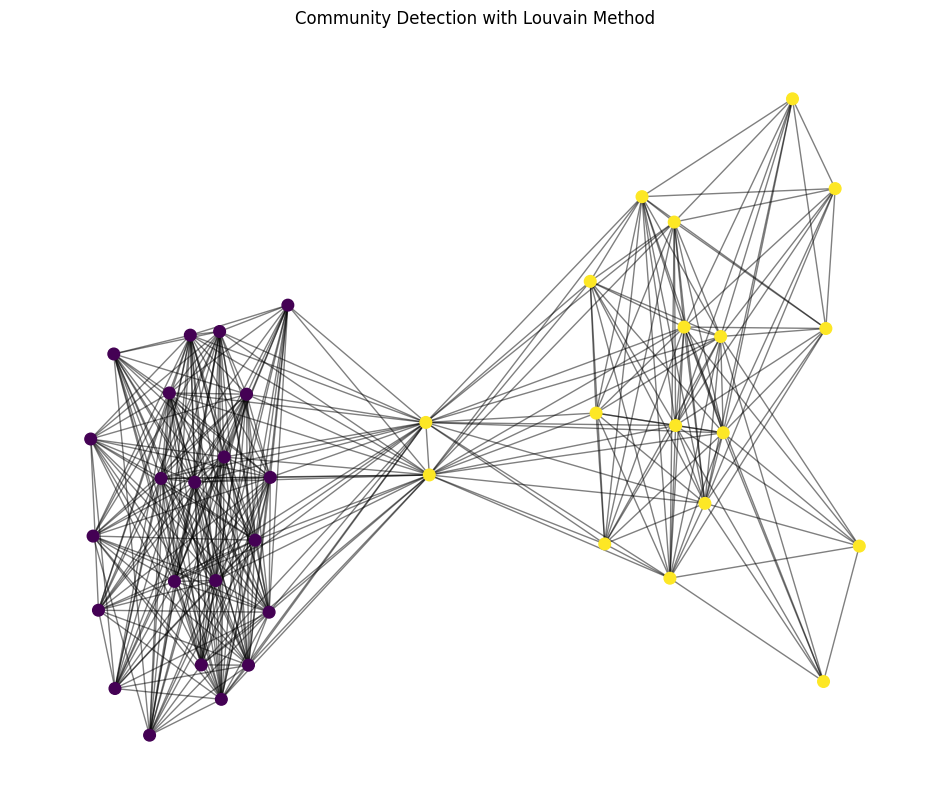

In [29]:
import matplotlib.cm as cm
from community import community_louvain

# Centrality Analysis
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# top 5 nodes for each centrality measure
print("Top 5 Nodes by Degree Centrality:", sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("Top 5 Nodes by Betweenness Centrality:", sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("Top 5 Nodes by Closeness Centrality:", sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

# Community Detection using Louvain Method
partition = community_louvain.best_partition(G)

# Visualization of communities
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=70, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Community Detection with Louvain Method")
plt.axis('off')
plt.show()


Path Analysis

In [7]:
pip install tkinter

ERROR: Could not find a version that satisfies the requirement tkinter (from versions: none)
ERROR: No matching distribution found for tkinter


Shortest Path Analysis

In [30]:
from ipywidgets import Dropdown, Output, Button
from IPython.display import display

# Start node dropdown
start_dropdown = Dropdown(
    options=list(G.nodes),
    value=None,
    description='Start Node:',
    disabled=False,
)

# End node dropdown
end_dropdown = Dropdown(
    options=list(G.nodes),
    value=None,
    description='End Node:',
    disabled=False,
)

path_button = Button(description='Compute Shortest Path')

output = Output()

# Function to compute and display the shortest path
def on_button_clicked(b):
    with output:
        output.clear_output()
        start_node = start_dropdown.value
        end_node = end_dropdown.value
        if start_node and end_node:
            try:
                path = nx.shortest_path(G, source=start_node, target=end_node)
                print(f"The shortest path from {start_node} to {end_node} is: {path}")
            except nx.NetworkXNoPath:
                print(f"No path exists between {start_node} and {end_node}.")
            except nx.NodeNotFound:
                print(f"One of the selected nodes does not exist.")

path_button.on_click(on_button_clicked)

# Display widgets
display(start_dropdown, end_dropdown, path_button, output)


Dropdown(description='Start Node:', options=('SOS008L02P', 'SOS005L04P', 'SOS003L04P', 'SOS002L09P', 'SOS001L1…

Dropdown(description='End Node:', options=('SOS008L02P', 'SOS005L04P', 'SOS003L04P', 'SOS002L09P', 'SOS001L12P…

Button(description='Compute Shortest Path', style=ButtonStyle())

Output()

Connectivity Analysis

The graph has 1 connected components.
Component 1: {'SO0002L09P', 'EEA500G12P', 'MAC1K25P', 'MAP1K25P', 'ATPPCH5X5K', 'SOS001L12P', 'POPF01L12P', 'ATN02K12P', 'POP500M24P', 'ATWWP001K24P', 'ATPA1K24P', 'SO0500M24P', 'SOS500M24P', 'MAR01K24P', 'SOS250M48P', 'SOS002L09P', 'POV500M24P', 'POP005L04P', 'AT5X5K', 'POP002L09P', 'SE500G24P', 'ATN01K24P', 'POV002L09P', 'POP015K', 'SOP001L12P', 'ATWWP002K12P', 'MAR02K12P', 'SE200G24P', 'MAPA1K24P', 'POV005L04P', 'POP001L12P', 'MASR025K', 'POV001L24P', 'SO0005L04P', 'EEA200G24P', 'SOS008L02P', 'SO0001L12P', 'SOS003L04P', 'SOS005L04P', 'MAHS025K'}
Articulation points in the graph: []


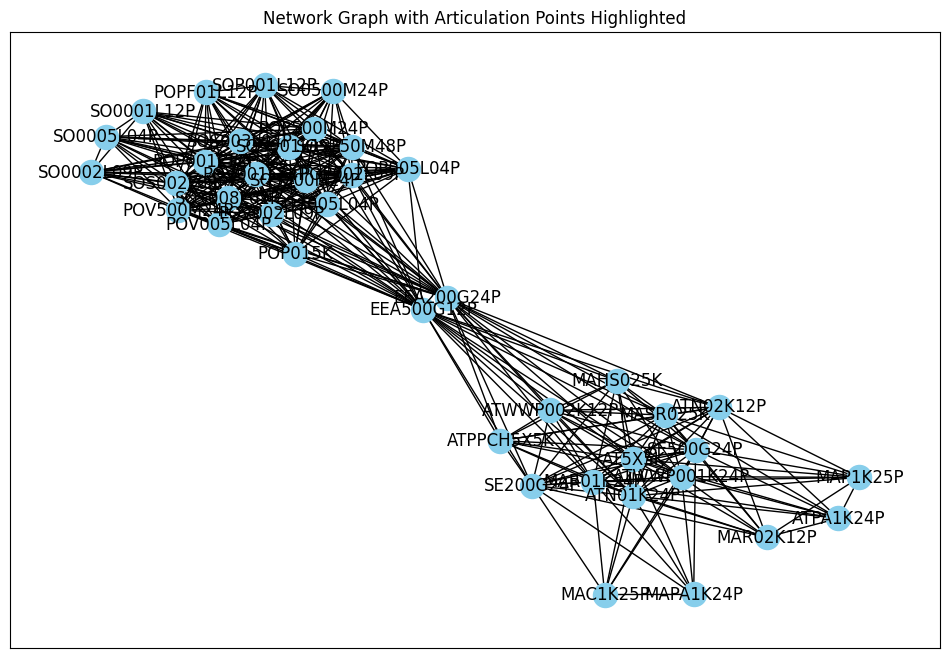

In [31]:
# Connected components
connected_components = list(nx.connected_components(G))
num_components = len(connected_components)
print(f"The graph has {num_components} connected components.")

# Display connected components
for i, component in enumerate(connected_components, start=1):
    print(f"Component {i}: {component}")

# Articulation points
articulation_points = list(nx.articulation_points(G))
print(f"Articulation points in the graph: {articulation_points}")

# Visualization of the articulation points
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='skyblue', label=True)
nx.draw_networkx_nodes(G, pos, nodelist=articulation_points, node_color='red', label=True)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.title('Network Graph with Articulation Points Highlighted')
plt.show()


Robustness and Resilience Analysis

Network Robustness

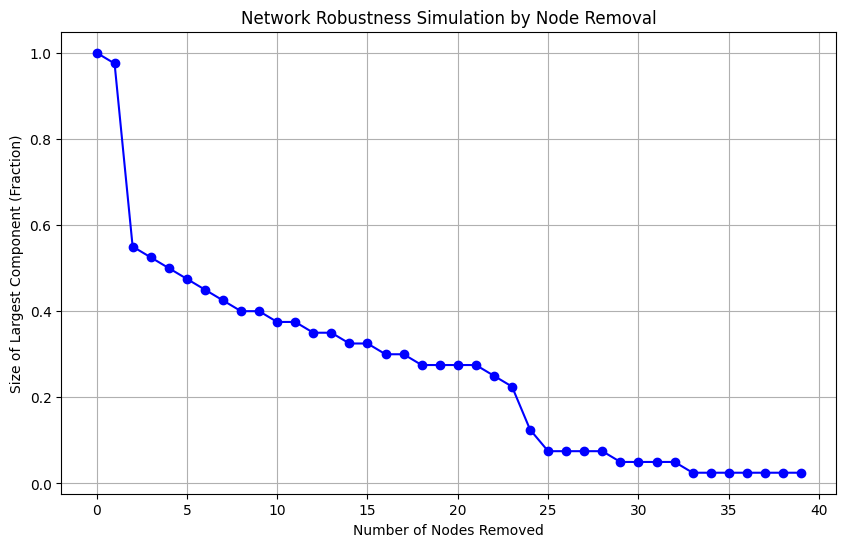

In [32]:
import numpy as np
# Original graph clone
G_copy = G.copy()

# List to store the size of the largest component as nodes are removed
sizes = []

# Remove nodes one by one based on highest degree centrality
while len(G_copy.nodes) > 0:
    largest_component = max(nx.connected_components(G_copy), key=len)
    sizes.append(len(largest_component) / len(G.nodes))

    # Find node with highest degree centrality
    degree_centrality = nx.degree_centrality(G_copy)
    max_degree_node = max(degree_centrality, key=degree_centrality.get)

    # Remove this node
    G_copy.remove_node(max_degree_node)

# Plot the robustness curve
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(sizes)), sizes, marker='o', linestyle='-', color='b')
plt.title('Network Robustness Simulation by Node Removal')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Component (Fraction)')
plt.grid(True)
plt.show()


Assortativity

In [33]:
assortativity = nx.degree_assortativity_coefficient(G)
print(f"Degree Assortativity Coefficient: {assortativity}")


Degree Assortativity Coefficient: 0.31154302573842124


Influence and Spread

Diffusion Processes

Step 0: 7 new infections
Step 1: 29 new infections
Step 2: 17 new infections
Step 3: 21 new infections
Step 4: 0 new infections
Step 5: 0 new infections
Step 6: 0 new infections
Step 7: 0 new infections
Step 8: 0 new infections
Step 9: 0 new infections


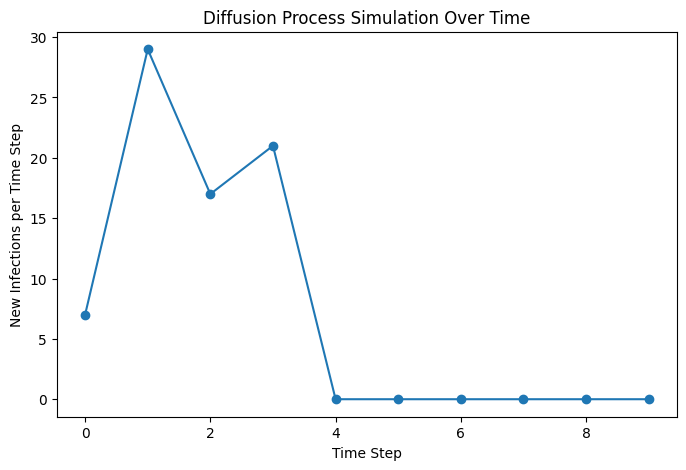

In [34]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# Set the initial probability of a node being infected and the infection rate
initial_infection_probability = 0.05
infection_rate = 0.3
num_steps = 10

# Initialize the infection status (True for infected, False for susceptible)
for node in G.nodes():
    G.nodes[node]['infected'] = random.random() < initial_infection_probability

# Simulate one step of the SI model
def diffusion_step(G, infection_rate):
    new_infections = []
    for node in G.nodes():
        if G.nodes[node]['infected']:
            neighbors = G.neighbors(node)
            for neighbor in neighbors:
                if not G.nodes[neighbor]['infected'] and random.random() < infection_rate:
                    new_infections.append(neighbor)
    for node in new_infections:
        G.nodes[node]['infected'] = True
    return len(new_infections)

# Simulate the diffusion process
infections_per_step = []
for step in range(num_steps):
    new_infections = diffusion_step(G, infection_rate)
    infections_per_step.append(new_infections)
    print(f"Step {step}: {new_infections} new infections")

# Plot the number of new infections per step
plt.figure(figsize=(8, 5))
plt.plot(infections_per_step, marker='o')
plt.title('Diffusion Process Simulation Over Time')
plt.xlabel('Time Step')
plt.ylabel('New Infections per Time Step')
plt.show()


In [35]:
# Simulate a cascading failure process
def cascading_failures(G, load_threshold):
    # Start with all nodes and check if they are overloaded
    overloaded_nodes = [node for node in G if G.degree(node) > load_threshold]
    while overloaded_nodes:
        # Take the last overloaded node
        node = overloaded_nodes.pop()
        # Check if the node is still in the graph
        if node in G:
            # Remove the node from the graph
            G.remove_node(node)
            # Check the neighbors of the removed node to see if they are now overloaded
            for neighbor in list(G):
                if G.degree(neighbor) > load_threshold and neighbor not in overloaded_nodes:
                    overloaded_nodes.append(neighbor)

# Create a copy of the graph to simulate on
G_cascade = G.copy()
# Assuming a load threshold
load_threshold = 5
# Simulate cascading failures
cascading_failures(G_cascade, load_threshold)

# The remaining network (G_cascade) is the network after cascading failures
remaining_nodes = len(G_cascade.nodes())
print(f"Nodes remaining after cascading failures: {remaining_nodes}")


Nodes remaining after cascading failures: 0


Spectral Analysis

The Fiedler value is: 1.324780771005439


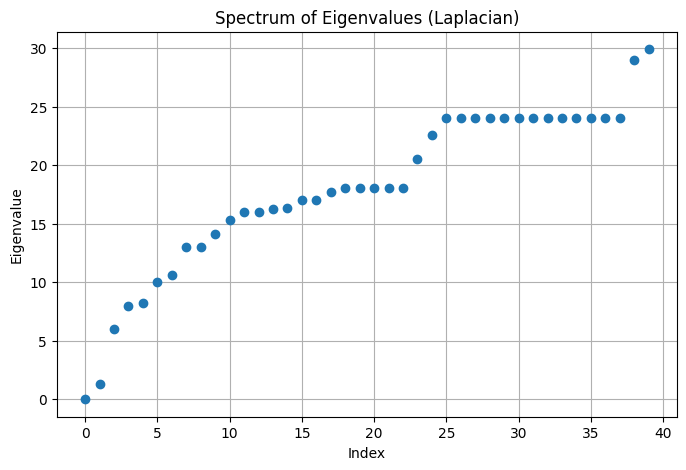

In [36]:
# Laplacian matrix of the graph
L = nx.laplacian_matrix(G).toarray()

# eigenvalues and eigenvectors of the Laplacian matrix
eigenvalues, eigenvectors = np.linalg.eigh(L)

# The Fiedler value is the second smallest eigenvalue
fiedler_value = eigenvalues[1]
print(f"The Fiedler value is: {fiedler_value}")

# Plot the spectrum of eigenvalues
plt.figure(figsize=(8, 5))
plt.plot(eigenvalues, 'o')
plt.title('Spectrum of Eigenvalues (Laplacian)')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()


Bottleneck

In [37]:
fiedler_vector = eigenvectors[:, 1]

# threshold to select these nodes
threshold = 0.01  # can adjust
bottleneck_nodes = [node for node, value in zip(G.nodes(), fiedler_vector) if abs(value) < threshold]
print(f"Bottleneck nodes: {bottleneck_nodes}")


Bottleneck nodes: ['EEA500G12P', 'EEA200G24P']


Flow Analysis

Mx/Min Flow

In [38]:
from ipywidgets import Dropdown, Button, Output
from IPython.display import display, clear_output

# dropdowns for source and sink selection
source_dropdown = Dropdown(
    options=list(G.nodes),
    value=None,
    description='Source:',
    disabled=False,
)

sink_dropdown = Dropdown(
    options=list(G.nodes),
    value=None,
    description='Sink:',
    disabled=False,
)

# button to calculate maximum flow and minimum cut
calculate_button = Button(
    description='Calculate Flow/Cut',
    disabled=False,
    button_style='',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to calculate maximum flow and minimum cut',
)

# Output widget to display the results
output_widget = Output()

def on_calculate_button_clicked(b):
    with output_widget:
        clear_output()
        source = source_dropdown.value
        sink = sink_dropdown.value

        # Check if the source and sink are selected
        if source is None or sink is None:
            print("Please select both a source and a sink.")
            return

        # Calculate the maximum flow and minimum cut
        flow_value, flow_dict = nx.maximum_flow(G, source, sink)
        cut_value, partition = nx.minimum_cut(G, source, sink)

        # Display the results
        print(f"Maximum flow from {source} to {sink}: {flow_value}")
        print(f"Minimum cut between {source} and {sink}: {cut_value}")
        reachable, non_reachable = partition
        print("Nodes reachable from the source in the residual network:", reachable)
        print("Nodes non-reachable from the source in the residual network:", non_reachable)

calculate_button.on_click(on_calculate_button_clicked)

# Display the widgets
display(source_dropdown, sink_dropdown, calculate_button, output_widget)


Dropdown(description='Source:', options=('SOS008L02P', 'SOS005L04P', 'SOS003L04P', 'SOS002L09P', 'SOS001L12P',…

Dropdown(description='Sink:', options=('SOS008L02P', 'SOS005L04P', 'SOS003L04P', 'SOS002L09P', 'SOS001L12P', '…

Button(description='Calculate Flow/Cut', style=ButtonStyle(), tooltip='Click to calculate maximum flow and min…

Output()

Graph Density

In [39]:
density = nx.density(G)
print(f"The density of the network is: {density}")


The density of the network is: 0.46153846153846156


Clustering Coefficient

In [40]:
# Global Clustering Coefficient (Transitivity)
global_clustering_coefficient = nx.transitivity(G)
print(f"The global clustering coefficient of the network is: {global_clustering_coefficient}")

# Average Local Clustering Coefficient
avg_clustering_coefficient = nx.average_clustering(G)
print(f"The average local clustering coefficient of the network is: {avg_clustering_coefficient}")


The global clustering coefficient of the network is: 0.8452026221692491
The average local clustering coefficient of the network is: 0.8841208860748836


Degree Distributions

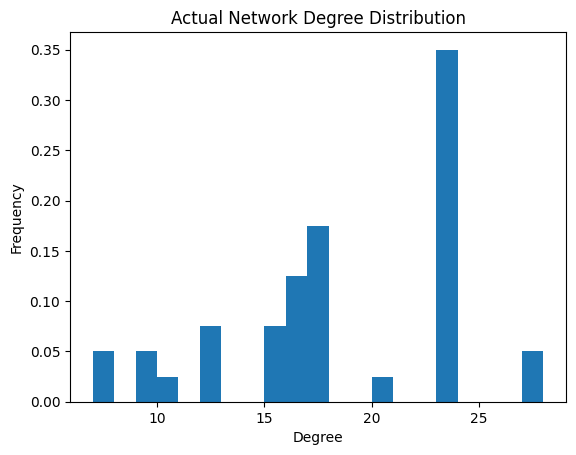

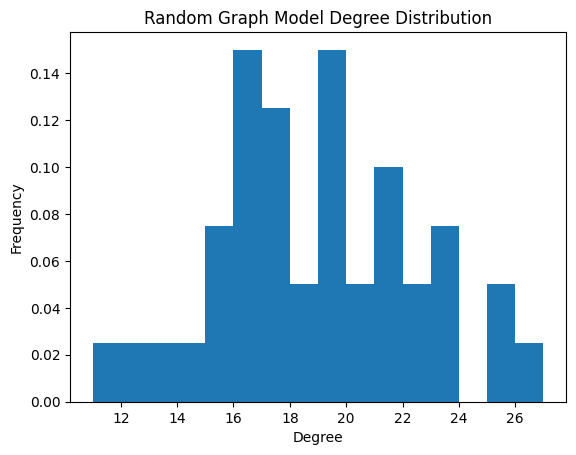

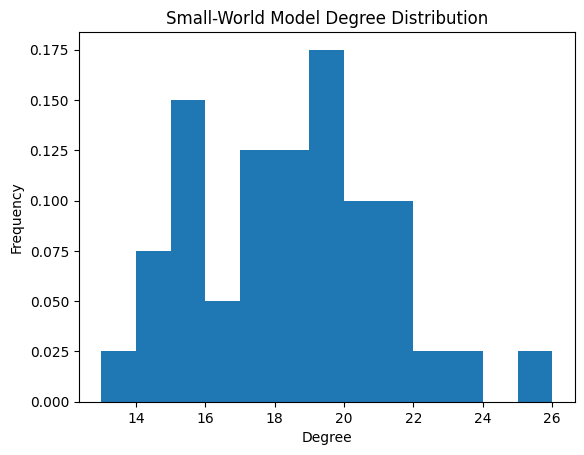

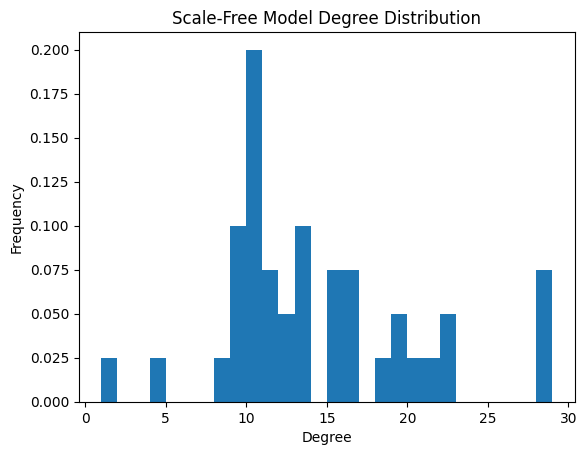

Actual network global clustering coefficient: 0.8452026221692491
Actual network average clustering coefficient: 0.8841208860748836
Random graph clustering coefficient: 0.48016049933125277
Small-world graph clustering coefficient: 0.4477040816326531
Scale-free graph clustering coefficient: 0.4566262302586404
Actual network average shortest path length: 1.8025641025641026
Random graph average shortest path length: 1.5256410256410255
Small-world graph average shortest path length: 1.5384615384615385
Scale-free graph average shortest path length: 1.6576923076923078


In [41]:
import matplotlib.pyplot as plt
import networkx as nx

# density and clustering coefficient for the actual graph
density = nx.density(G)
global_clustering_coefficient = nx.transitivity(G)
average_clustering_coefficient = nx.average_clustering(G)

# Random Graph Model
random_graph = nx.erdos_renyi_graph(n=len(G.nodes()), p=density)

# Small-World Model and average degree of G
k = int(sum(dict(G.degree()).values()) / len(G.nodes()))
small_world_graph = nx.watts_strogatz_graph(n=len(G.nodes()), k=k, p=average_clustering_coefficient)

# Scale-Free Model
scale_free_graph = nx.barabasi_albert_graph(n=len(G.nodes()), m=k//2)  # m is usually a smaller value than k

# plot degree distribution
def plot_degree_distribution(G, title):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), density=True)
    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()

plot_degree_distribution(G, 'Actual Network Degree Distribution')
plot_degree_distribution(random_graph, 'Random Graph Model Degree Distribution')
plot_degree_distribution(small_world_graph, 'Small-World Model Degree Distribution')
plot_degree_distribution(scale_free_graph, 'Scale-Free Model Degree Distribution')

# Compare clustering coefficients
print(f"Actual network global clustering coefficient: {global_clustering_coefficient}")
print(f"Actual network average clustering coefficient: {average_clustering_coefficient}")
print(f"Random graph clustering coefficient: {nx.transitivity(random_graph)}")
print(f"Small-world graph clustering coefficient: {nx.transitivity(small_world_graph)}")
print(f"Scale-free graph clustering coefficient: {nx.transitivity(scale_free_graph)}")

# compare average shortest path lengths if the graph is connected
if nx.is_connected(G):
    print(f"Actual network average shortest path length: {nx.average_shortest_path_length(G)}")
if nx.is_connected(random_graph):
    print(f"Random graph average shortest path length: {nx.average_shortest_path_length(random_graph)}")
if nx.is_connected(small_world_graph):
    print(f"Small-world graph average shortest path length: {nx.average_shortest_path_length(small_world_graph)}")

# scale-free networks generated by Barabási-Albert are connected
print(f"Scale-free graph average shortest path length: {nx.average_shortest_path_length(scale_free_graph)}")


Node Analysis, Correlation Analysis & Anomaly Detection

In [22]:
file_paths = [
    '/content/drive/MyDrive/EarthEngineData/Raw Dataset/Temporal Data/Unit/Delivery To distributor.csv',
    '/content/drive/MyDrive/EarthEngineData/Raw Dataset/Temporal Data/Unit/Factory Issue.csv',
    '/content/drive/MyDrive/EarthEngineData/Raw Dataset/Temporal Data/Unit/Production .csv',
    '/content/drive/MyDrive/EarthEngineData/Raw Dataset/Temporal Data/Unit/Sales Order.csv',
    '/content/drive/MyDrive/EarthEngineData/Raw Dataset/Temporal Data/Weight/Delivery to Distributor.csv',
    '/content/drive/MyDrive/EarthEngineData/Raw Dataset/Temporal Data/Weight/Factory Issue.csv',
    '/content/drive/MyDrive/EarthEngineData/Raw Dataset/Temporal Data/Weight/Production .csv',
    '/content/drive/MyDrive/EarthEngineData/Raw Dataset/Temporal Data/Weight/Sales Order .csv'
]

for i, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path)

df.head()

,Date,SOS008L02P,SOS005L04P,SOS003L04P,SOS002L09P,SOS001L12P,SOS500M24P,SOS250M48P,SOP001L12P,POV005L04P,...,MAHS025K,SE500G24P,SE200G24P,ATPPCH5X5K,ATPA1K24P,MAPA1K24P,MAP1K25P,MAC1K25P,EEA500G12P,EEA200G24P
0,2023-01-01 00:00:00,19.94560,231.7296,21.51696,241.047360,236.189760,94.41408,12.79536,1.104000,6.3336,...,0.625,9.042000,1.0800,0.0,0.0,0.0,0.0,0.000,0.0,0.0
1,2023-01-02 00:00:00,4.97536,214.8568,20.33568,216.687600,188.331360,79.56528,5.54208,1.766400,2.9120,...,0.000,3.612000,0.5232,0.0,0.0,0.0,0.0,0.000,0.0,0.0
2,2023-01-03 00:00:00,3.32672,157.3384,12.53040,141.970668,134.445120,46.74336,3.20160,3.069120,3.4580,...,0.000,8.178000,0.4800,0.0,0.0,0.0,0.0,0.288,0.0,0.0
3,2023-01-04 00:00:00,3.28992,196.2774,10.67568,140.546558,120.557716,44.66784,5.35440,0.644924,4.2952,...,0.050,4.540002,0.6240,0.0,0.0,0.0,0.0,0.600,0.0,0.0
4,2023-01-05 00:00:00,3.42976,273.4976,19.68432,197.446702,186.918240,70.18128,6.12720,0.695520,3.8220,...,0.925,8.388000,0.7440,0.0,0.0,0.0,0.0,0.000,0.0,0.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# load the data and perform the analysis
def analyze_temporal_data(file_paths, attribute_name):
    dataframes = {}
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
        df['Total Interactions'] = df.sum(axis=1)
        dataframes[file_path] = df

        # Node-Level Analysis for all nodes
        for column in df.columns[:-1]:  # Exclude the 'Total Interactions' column
            plt.figure(figsize=(15, 5))
            plt.plot(df.index, df[column], label=f'{attribute_name} of {column}')
            plt.title(f'Activity Over Time for {column} ({attribute_name})')
            plt.xlabel('Date')
            plt.ylabel(f'Activity Level ({attribute_name})')
            plt.legend()
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

        # Correlation Analysis
        correlation_matrix = df.drop('Total Interactions', axis=1).corr()
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
        plt.title(f'Correlation Matrix Between Nodes ({attribute_name})')
        plt.show()

        # Anomaly Detection using standard deviation
        mean_total_interactions = df['Total Interactions'].mean()
        std_total_interactions = df['Total Interactions'].std()
        threshold = 2  # Number of standard deviations to consider as an anomaly
        anomalies = df[np.abs(df['Total Interactions'] - mean_total_interactions) > threshold * std_total_interactions]

        # Plot anomalies
        plt.figure(figsize=(15, 5))
        plt.plot(df.index, df['Total Interactions'], label='Total Interactions')
        plt.scatter(anomalies.index, anomalies['Total Interactions'], color='red', label='Anomaly', zorder=5)
        plt.title(f'Anomalies in Total Interactions Over Time ({attribute_name})')
        plt.xlabel('Date')
        plt.ylabel('Total Interactions')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    return dataframes

# File paths for Unit and Weight
unit_file_paths = [
    '/content/drive/MyDrive/EarthEngineData/Raw Dataset/Temporal Data/Unit/Delivery To distributor.csv',
    '/content/drive/MyDrive/EarthEngineData/Raw Dataset/Temporal Data/Unit/Factory Issue.csv',
    '/content/drive/MyDrive/EarthEngineData/Raw Dataset/Temporal Data/Unit/Production .csv',
    '/content/drive/MyDrive/EarthEngineData/Raw Dataset/Temporal Data/Unit/Sales Order.csv'
]
weight_file_paths = [
    '/content/drive/MyDrive/EarthEngineData/Raw Dataset/Temporal Data/Weight/Delivery to Distributor.csv',
    '/content/drive/MyDrive/EarthEngineData/Raw Dataset/Temporal Data/Weight/Factory Issue.csv',
    '/content/drive/MyDrive/EarthEngineData/Raw Dataset/Temporal Data/Weight/Production .csv',
    '/content/drive/MyDrive/EarthEngineData/Raw Dataset/Temporal Data/Weight/Sales Order .csv'
]

# Perform the analysis for both Unit and Weight
unit_dataframes = analyze_temporal_data(unit_file_paths, 'Unit')
weight_dataframes = analyze_temporal_data(weight_file_paths, 'Weight')

Graph Embeddings

In [42]:
!pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.4 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch

Classification

In [7]:
from node2vec import Node2Vec
import networkx as nx

# Ensure the graph G is available and has been created correctly

# Initialize Node2Vec with your graph G. This can take a while.
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)

# Train node2vec model. This step may take a while depending on the size of your graph.
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Since your nodes are already strings, you can skip the relabel_nodes step

# Choose a node that exists in your graph, for example 'EEA500G12P'
node_label = 'EEA500G12P'
if node_label in model.wv:
    vector_for_node = model.wv[node_label]
    print(f"Embedding for node '{node_label}':")
    print(vector_for_node)
else:
    print(f"Node '{node_label}' does not exist in the embeddings.")

# Save embeddings for the entire graph
model.wv.save_word2vec_format('embeddings.emb')


Computing transition probabilities:   0%|          | 0/40 [00:00<?, ?it/s]

Embedding for node 'EEA500G12P':
[ 0.14150232  0.04714911  0.06659006  0.00307422 -0.06626832 -0.16067491
  0.07737685  0.11812248 -0.0425375  -0.06994524  0.12852411 -0.09266387
  0.11990081  0.08455071  0.11962996  0.01458915 -0.0946163  -0.00117699
 -0.07084208 -0.00423841  0.05217804  0.10550058  0.22982213 -0.01410333
  0.04532831  0.09507753  0.02108519  0.06242894  0.02994932 -0.05963339
 -0.10654729  0.01888161 -0.20260769 -0.207038   -0.1486613   0.06450823
  0.00456941  0.1828929   0.22548379  0.00906692  0.08122775  0.04327032
 -0.03953011 -0.13756129 -0.03882964  0.07244901 -0.04400067 -0.10953094
  0.11709736  0.07330771 -0.0777363   0.07676399 -0.00708621  0.18845133
  0.16172177  0.15627727  0.03932194 -0.12237325 -0.01870308 -0.05009972
  0.12974449 -0.04208279 -0.01095347  0.09507313]


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Retrieve node embeddings from the model for all nodes in G
embeddings = np.array([model.wv[node] for node in G.nodes()])

labels = np.random.randint(0, 2, size=(len(G.nodes()),))

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.3, random_state=42)

# Initialize the classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification report:
               precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.60      0.50      0.55         6

    accuracy                           0.58        12
   macro avg       0.59      0.58      0.58        12
weighted avg       0.59      0.58      0.58        12

Accuracy: 0.5833333333333334


Node Classification

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

labels = np.random.randint(2, size=embeddings.shape[0])

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.3, random_state=42)

# Train a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Evaluate the classifier
predictions = classifier.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")


Accuracy: 0.5833333333333334


Clustering (K-Means)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


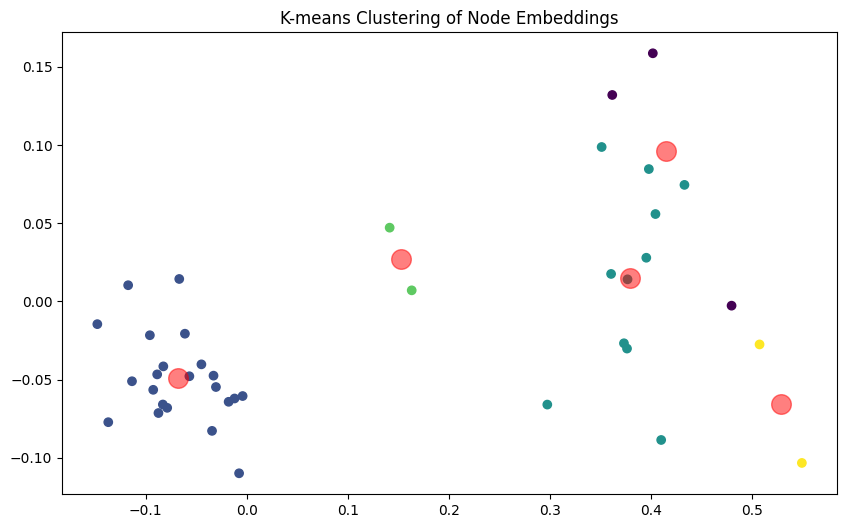

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# adjust - use elbow method
k = 5

# Perform k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(embeddings)

# Visualize the clustering (assuming 2D embeddings for simplicity)
plt.figure(figsize=(10, 6))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=clusters, cmap='viridis', marker='o')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title("K-means Clustering of Node Embeddings")
plt.show()


Link prediction

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate similarity matrix
similarity_matrix = cosine_similarity(embeddings)

# Example: Predict link for a pair of nodes
node_a, node_b = 0, 1  # Example node indices
similarity_score = similarity_matrix[node_a, node_b]

print(f"Similarity between node {node_a} and node {node_b}: {similarity_score}")


Similarity between node 0 and node 1: 0.9209651947021484


Support Vector Machine (SVM)

In [13]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf')

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Evaluate the classifier
svm_predictions = svm_classifier.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, svm_predictions)}")


SVM Accuracy: 0.5


Gradient Boosting Machines (GBM)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GBM classifier
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

# Train the classifier
gbm_classifier.fit(X_train, y_train)

# Evaluate the classifier
gbm_predictions = gbm_classifier.predict(X_test)
print(f"GBM Accuracy: {accuracy_score(y_test, gbm_predictions)}")


GBM Accuracy: 0.5


Neural Network Classifier

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# simple feed-forward neural network
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multiclass classification
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print(f"Neural Network Accuracy: {accuracy}")


Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.7066 - accuracy: 0.4400 - val_loss: 0.6529 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 39ms/step - loss: 0.6957 - accuracy: 0.4400 - val_loss: 0.6673 - val_accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 0s 41ms/step - loss: 0.6862 - accuracy: 0.6400 - val_loss: 0.6810 - val_accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 0s 55ms/step - loss: 0.6775 - accuracy: 0.6400 - val_loss: 0.6953 - val_accuracy: 0.6667
Epoch 5/10
1/1 [==============================] - 0s 42ms/step - loss: 0.6697 - accuracy: 0.6400 - val_loss: 0.7100 - val_accuracy: 0.6667
Epoch 6/10
1/1 [==============================] - 0s 38ms/step - loss: 0.6625 - accuracy: 0.6400 - val_loss: 0.7231 - val_accuracy: 0.3333
Epoch 7/10
1/1 [==============================] - 0s 38ms/step - loss: 0.6560 - accuracy: 0.6400 - val_loss: 0.7357 - val_accuracy: 0.3333
Epoch 8/10
1/1 [=============